In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as syn

In [2]:
df=pd.read_csv("Crop_recommendation (1).csv")
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [3]:
df.duplicated().sum()

0

In [4]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [5]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [6]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

<Axes: xlabel='label'>

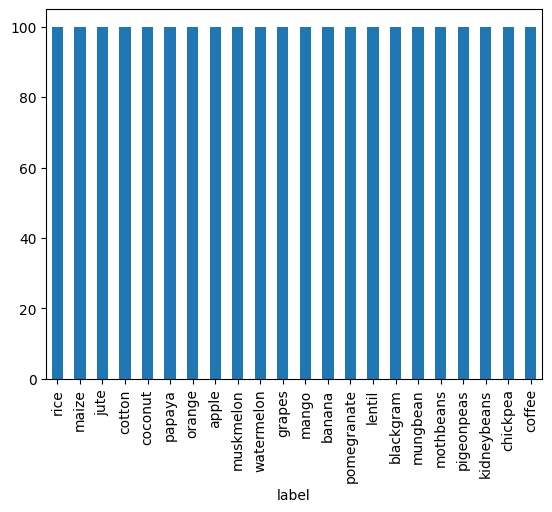

In [7]:
df['label'].value_counts().plot(kind='bar')

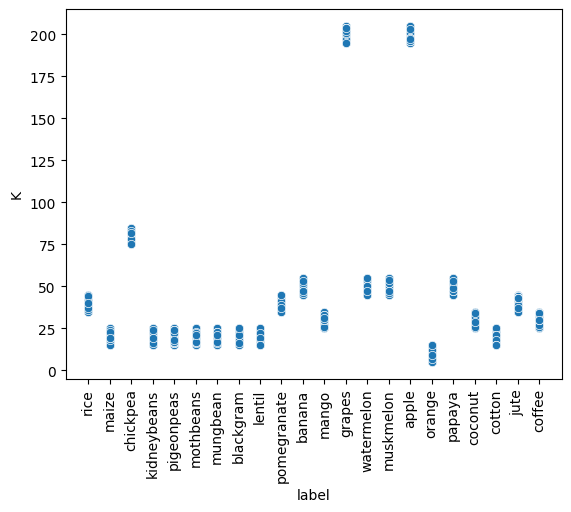

In [8]:
syn.scatterplot(x=df['label'],y=df['K'])
plt.xticks(rotation=90)
plt.show()

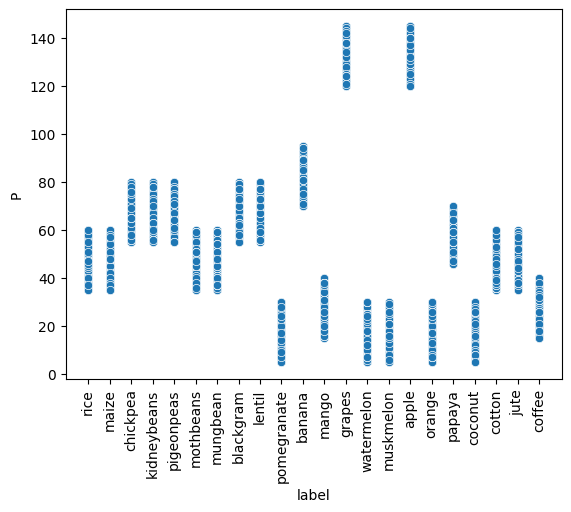

In [9]:
syn.scatterplot(x=df['label'],y=df['P'])
plt.xticks(rotation=90)
plt.show()

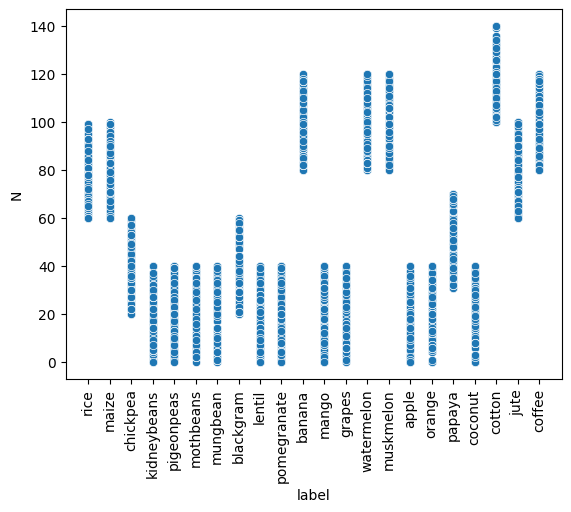

In [10]:
syn.scatterplot(x=df['label'],y=df['N'])
plt.xticks(rotation=90)
plt.show()

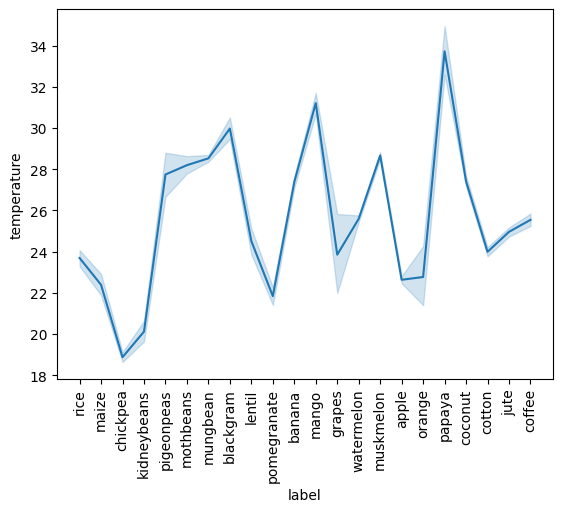

In [11]:
syn.lineplot(x=df['label'],y=df['temperature'])
plt.xticks(rotation=90)
plt.show()

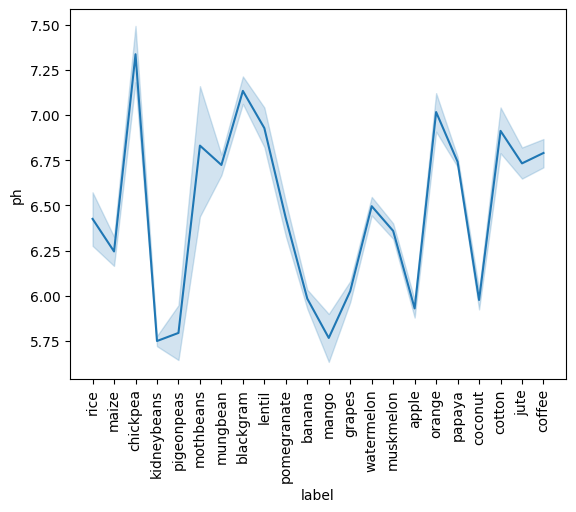

In [12]:
syn.lineplot(x=df['label'],y=df['ph'])
plt.xticks(rotation=90)
plt.show()

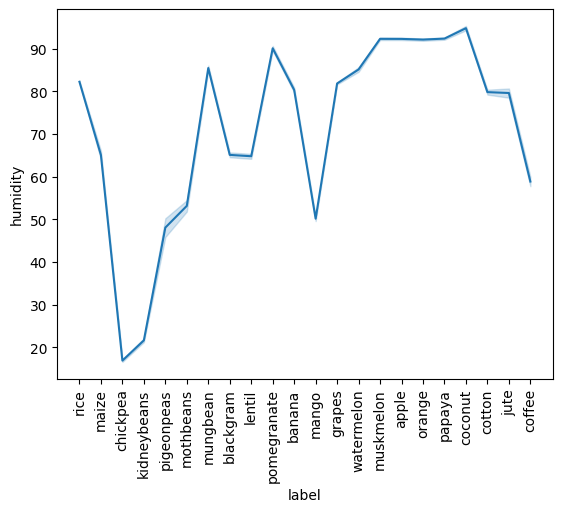

In [13]:
syn.lineplot(x=df['label'],y=df['humidity'])
plt.xticks(rotation=90)
plt.show()

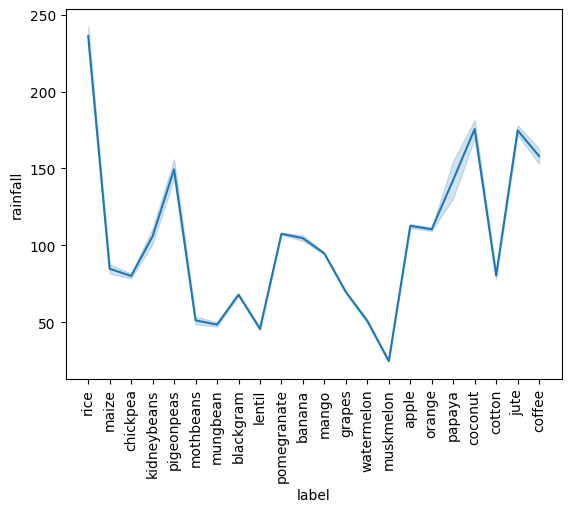

In [14]:
syn.lineplot(x=df['label'],y=df['rainfall'])
plt.xticks(rotation=90)
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [16]:
new_df = df.copy()
x = new_df.drop(['label'], axis=1)
y = new_df['label']
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3)

created a copy of df as new_df.   then dropped a column label and a variable y was assigned to it and the altered new_df is assigned a variable x 

In [17]:
x_train.head()

,N,P,K,temperature,humidity,ph,rainfall
1880,35,30,34,28.297476,95.411228,6.141502,182.448235
1090,117,82,45,25.293915,79.291222,5.614471,105.422025
1212,9,122,201,29.587484,80.919344,5.570291,68.064173
711,57,67,25,32.347440,66.614528,7.551364,64.558823
220,26,80,83,17.084985,16.145658,7.528600,71.310073


In [18]:
x_test.head()

,N,P,K,temperature,humidity,ph,rainfall
1997,110,39,18,24.547953,75.397527,7.766260,63.880799
444,16,73,19,18.416456,34.805410,4.684079,163.274747
1896,28,27,32,28.940997,93.001090,5.764615,191.772309
2133,82,24,33,26.535432,67.096081,6.809594,120.649443
1469,95,30,52,29.480699,90.336987,6.640471,26.036577


In [19]:
y_train.head()

1880      coconut
1090       banana
1212       grapes
711     blackgram
220      chickpea
Name: label, dtype: object

In [20]:
y_test.head()

1997        cotton
444     pigeonpeas
1896       coconut
2133        coffee
1469     muskmelon
Name: label, dtype: object

In [21]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train,y_train)

RandomForestClassifier()

i have used Randomn Forest Classifier to predict the label(crop name) based on all the other factors

In [22]:
y_pred = rf_classifier.predict(x_train)  
y_pred

array(['coconut', 'banana', 'grapes', ..., 'coffee', 'cotton', 'lentil'],
      dtype=object)

In [23]:
y_train

1880        coconut
1090         banana
1212         grapes
711       blackgram
220        chickpea
           ...     
374     kidneybeans
147           maize
2108         coffee
1907         cotton
845          lentil
Name: label, Length: 1540, dtype: object

In [24]:
rf_pred = rf_classifier.predict(x_test)
rf_pred

array(['cotton', 'pigeonpeas', 'coconut', 'coffee', 'muskmelon',
       'muskmelon', 'pomegranate', 'apple', 'banana', 'coffee',
       'pigeonpeas', 'apple', 'mungbean', 'apple', 'mango', 'grapes',
       'blackgram', 'mango', 'rice', 'kidneybeans', 'maize', 'chickpea',
       'chickpea', 'chickpea', 'pigeonpeas', 'pigeonpeas', 'apple',
       'kidneybeans', 'lentil', 'papaya', 'blackgram', 'mothbeans',
       'banana', 'rice', 'kidneybeans', 'kidneybeans', 'lentil', 'jute',
       'mothbeans', 'muskmelon', 'mango', 'pigeonpeas', 'mothbeans',
       'coconut', 'grapes', 'orange', 'lentil', 'pigeonpeas',
       'pomegranate', 'mothbeans', 'lentil', 'maize', 'lentil', 'banana',
       'apple', 'kidneybeans', 'papaya', 'coconut', 'jute', 'chickpea',
       'banana', 'kidneybeans', 'papaya', 'rice', 'banana', 'watermelon',
       'apple', 'orange', 'pigeonpeas', 'banana', 'pomegranate',
       'mungbean', 'apple', 'pomegranate', 'blackgram', 'apple',
       'mothbeans', 'coconut', 'maize'

In [25]:
y_test

1997        cotton
444     pigeonpeas
1896       coconut
2133        coffee
1469     muskmelon
           ...    
2025          jute
496     pigeonpeas
1044        banana
1844       coconut
2103        coffee
Name: label, Length: 660, dtype: object

In [26]:
print(f'Accuracy: {accuracy_score(y_test, rf_pred)}')
print(classification_report(y_test, rf_pred))

Accuracy: 0.996969696969697
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        31
      banana       1.00      1.00      1.00        27
   blackgram       1.00      1.00      1.00        28
    chickpea       1.00      1.00      1.00        31
     coconut       1.00      1.00      1.00        30
      coffee       1.00      1.00      1.00        34
      cotton       1.00      1.00      1.00        27
      grapes       1.00      1.00      1.00        28
        jute       0.93      1.00      0.96        27
 kidneybeans       1.00      1.00      1.00        38
      lentil       1.00      1.00      1.00        32
       maize       1.00      1.00      1.00        30
       mango       1.00      1.00      1.00        38
   mothbeans       1.00      1.00      1.00        34
    mungbean       1.00      1.00      1.00        25
   muskmelon       1.00      1.00      1.00        26
      orange       1.00      1.00      1.00        25

accuracy score= TP+TN / TP+TN+FP+FN


classification report: 
    Precision = TP / (TP + FP), 
    Recall= TP / (TP + FN), 
    f1_score= 2 * (Precision * Recall) / (Precision + Recall)

In [27]:
import pickle
pickle.dump(rf_classifier,open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))

in the above piece of code, we are trying to dump our prediction content (rf_classifier) into pickle in write mode and its named as model.pkl

then we tried to load the same model in read mode and named it as model